In [13]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn import datasets
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

#https://github.com/VenkateshUV/Comprehending-K-Means-and-KNN-Algorithms/blob/master/Knn%20and%20K-Means.ipynb

In [14]:
family = pd.read_csv("Family2.csv")

In [15]:
family

,n_residents,n_small_kids,n_growup_kids,n_elderly,n_disable,family,first_security,second_security,first_comfort,second_comfort,fisrt_energy
0,1,0,0,0,1,one_eld_dis,surveillance,lack_energ,light,NaN,distrib
1,3,1,0,0,0,wkid,surveillance,lack_energ,light,hvac,distrib
2,2,1,0,0,0,mkid,lack_energ,water_leak,light,b_control,distrib
3,4,1,1,0,0,wkid,lack_energ,alarm,light,hvac,distrib
4,1,0,0,0,0,one_house,surveillance,lack_energ,NaN,NaN,domest_eq
5,5,0,2,1,0,wkid_ed,alarm,lack_energ,b_control,hvac,distrib
6,2,0,0,2,0,eld_dis,surveillance,access,b_control,NaN,domest_eq
7,1,0,0,0,0,one_house,surveillance,NaN,light,hvac,distrib
8,2,1,0,0,0,mkid,alarm,surveillance,hvac,b_control,distrib
9,2,0,0,0,0,cohab,surveillance,water_leak,light,b_control,distrib


In [16]:
family_features = ['n_residents', 'n_small_kids', 'n_growup_kids', 'n_elderly',
       'n_disable']
X = family[family_features]
X

,n_residents,n_small_kids,n_growup_kids,n_elderly,n_disable
0,1,0,0,0,1
1,3,1,0,0,0
2,2,1,0,0,0
3,4,1,1,0,0
4,1,0,0,0,0
5,5,0,2,1,0
6,2,0,0,2,0
7,1,0,0,0,0
8,2,1,0,0,0
9,2,0,0,0,0


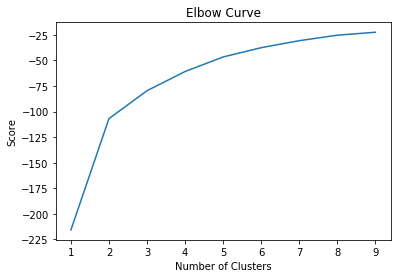

In [17]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [18]:
family_features = ['n_residents', 'n_small_kids', 'n_growup_kids', 'n_elderly',
       'n_disable']
X = family[family_features]
X.head()

,n_residents,n_small_kids,n_growup_kids,n_elderly,n_disable
0,1,0,0,0,1
1,3,1,0,0,0
2,2,1,0,0,0
3,4,1,1,0,0
4,1,0,0,0,0


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
name_le = LabelEncoder()
y = name_le.fit_transform(family['family'].values)
y1 = name_le.inverse_transform(y)

In [21]:
d = {'LabelEncoder' : y, 
   'Family Type' : y1}
pd.DataFrame(d)

,LabelEncoder,Family Type
0,3,one_eld_dis
1,5,wkid
2,2,mkid
3,5,wkid
4,4,one_house
5,6,wkid_ed
6,1,eld_dis
7,4,one_house
8,2,mkid
9,0,cohab


In [22]:
y

array([3, 5, 2, 5, 4, 6, 1, 4, 2, 0, 1, 1, 6, 2, 0, 0, 4, 1, 1, 3, 5, 2,
       5, 4, 6, 1, 4, 2, 0, 1, 1, 6, 2, 0, 0, 3, 1, 1, 1, 0, 4, 2, 0, 4,
       4, 6, 1, 4, 6, 1, 0, 1, 5, 3, 4])

In [23]:
family.head(10)

,n_residents,n_small_kids,n_growup_kids,n_elderly,n_disable,family,first_security,second_security,first_comfort,second_comfort,fisrt_energy
0,1,0,0,0,1,one_eld_dis,surveillance,lack_energ,light,NaN,distrib
1,3,1,0,0,0,wkid,surveillance,lack_energ,light,hvac,distrib
2,2,1,0,0,0,mkid,lack_energ,water_leak,light,b_control,distrib
3,4,1,1,0,0,wkid,lack_energ,alarm,light,hvac,distrib
4,1,0,0,0,0,one_house,surveillance,lack_energ,NaN,NaN,domest_eq
5,5,0,2,1,0,wkid_ed,alarm,lack_energ,b_control,hvac,distrib
6,2,0,0,2,0,eld_dis,surveillance,access,b_control,NaN,domest_eq
7,1,0,0,0,0,one_house,surveillance,NaN,light,hvac,distrib
8,2,1,0,0,0,mkid,alarm,surveillance,hvac,b_control,distrib
9,2,0,0,0,0,cohab,surveillance,water_leak,light,b_control,distrib


In [24]:
X.insert(5,'type',y)

In [25]:
X.head()

,n_residents,n_small_kids,n_growup_kids,n_elderly,n_disable,type
0,1,0,0,0,1,3
1,3,1,0,0,0,5
2,2,1,0,0,0,2
3,4,1,1,0,0,5
4,1,0,0,0,0,4


In [26]:
df_family = pd.DataFrame(X, columns = family_features + ['type'])

In [27]:
df_family.replace({'type': {0: 'Cohabit', 1:'Idoso-Defic',2:'Monoparental-kid',3:'Idoso-Sozinho',4:'Sozinho',5:'Pais-kid',6:'Idoso-Defic-kid'}})

,n_residents,n_small_kids,n_growup_kids,n_elderly,n_disable,type
0,1,0,0,0,1,Idoso-Sozinho
1,3,1,0,0,0,Pais-kid
2,2,1,0,0,0,Monoparental-kid
3,4,1,1,0,0,Pais-kid
4,1,0,0,0,0,Sozinho
5,5,0,2,1,0,Idoso-Defic-kid
6,2,0,0,2,0,Idoso-Defic
7,1,0,0,0,0,Sozinho
8,2,1,0,0,0,Monoparental-kid
9,2,0,0,0,0,Cohabit


In [28]:
X = df_family.iloc[:, :-1].values
y = df_family.iloc[:, 5].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

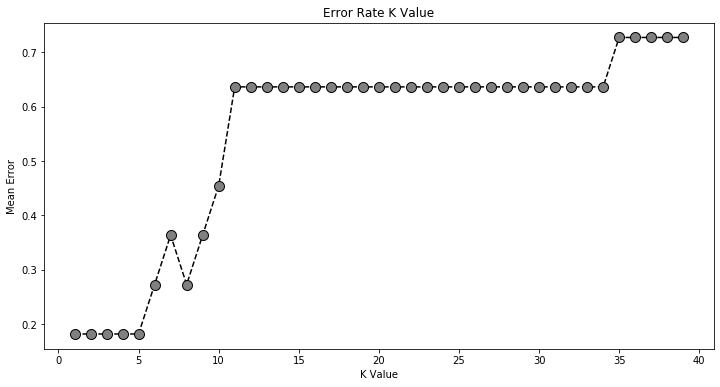

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='black', linestyle='dashed', marker='o',
         markerfacecolor='grey', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [33]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
y_pred = classifier.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 0 0 0 0 0]
 [1 2 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 2 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       0.50      1.00      0.67         1
           6       1.00      0.50      0.67         2

    accuracy                           0.82        11
   macro avg       0.86      0.86      0.82        11
weighted avg       0.89      0.82      0.82        11



In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [37]:
y_pred = classifier.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2 0 0 0 0 0]
 [1 2 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 2 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 1 1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       0.33      0.50      0.40         2

    accuracy                           0.64        11
   macro avg       0.50      0.53      0.50        11
weighted avg       0.64      0.64      0.62        11



C:\Users\gabid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
